In [20]:
import pandas as pd

In [21]:
data=pd.read_csv(r"C:\Users\91767\Desktop\projects\Spam_Mail_Prediction_using_LogisticRegression\mail_data.csv")

In [22]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [24]:
data.dropna()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [25]:
x=data['Message']
y=data['Category']

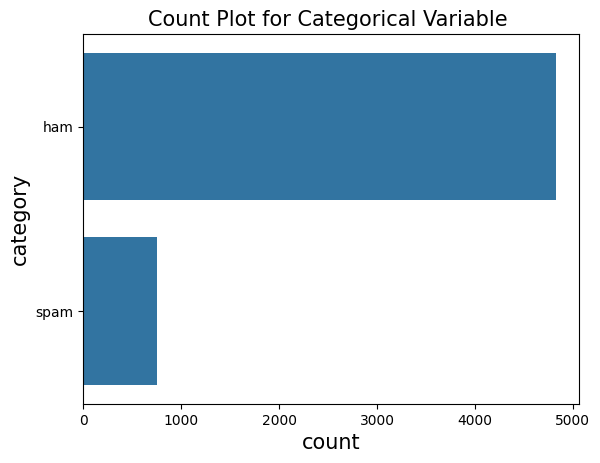

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data.Category)

plt.title('Count Plot for Categorical Variable ', fontsize = 15)
plt.xlabel('count', fontsize = 15)
plt.ylabel('category', fontsize = 15)

# display the plot
plt.show()

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
le.classes_

array(['ham', 'spam'], dtype=object)

In [27]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20,shuffle=True)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((4457,), (1115,), (4457,), (1115,))

In [28]:
x_train=xtrain
x_test=xtest

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

xtrain= feature_extraction.fit_transform(xtrain)
xtest = feature_extraction.transform(xtest)

In [30]:
from sklearn.metrics import accuracy_score,classification_report


In [31]:
from sklearn.naive_bayes import MultinomialNB

modelnb=MultinomialNB()

modelnb.fit(xtrain,ytrain)
ypred=modelnb.predict(xtest)
from sklearn.metrics import accuracy_score,classification_report
acclr=accuracy_score(ytest,ypred)
print(acclr)
crlr=classification_report(ytest,ypred)
print(crlr)

0.9704035874439462
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       969
           1       1.00      0.77      0.87       146

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [32]:
from sklearn.linear_model import LogisticRegression
modellr=LogisticRegression()
modellr.fit(xtrain,ytrain)
ypred=modellr.predict(xtest)
from sklearn.metrics import accuracy_score,classification_report
acclr=accuracy_score(ytest,ypred)
print(acclr)
crlr=classification_report(ytest,ypred)
print(crlr)

0.9596412556053812
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       969
           1       0.98      0.71      0.82       146

    accuracy                           0.96      1115
   macro avg       0.97      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115



In [33]:
from sklearn.linear_model import LogisticRegression
modellr=LogisticRegression()
modellr.fit(xtrain,ytrain)
ypred=modellr.predict(xtest)
from sklearn.metrics import accuracy_score,classification_report
acclr=accuracy_score(ytest,ypred)
print(acclr)
crlr=classification_report(ytest,ypred)
print(crlr)



0.9596412556053812
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       969
           1       0.98      0.71      0.82       146

    accuracy                           0.96      1115
   macro avg       0.97      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115



In [34]:
from sklearn.svm import SVC
modelsvc=SVC(kernel='rbf')

modelsvc.fit(xtrain,ytrain)
ypred=modelsvc.predict(xtest)
from sklearn.metrics import accuracy_score,classification_report
accsvc=accuracy_score(ytest,ypred)
print(accsvc)
crsvc=classification_report(ytest,ypred)
print(crsvc)


0.9775784753363229
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       969
           1       0.99      0.84      0.91       146

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [35]:
from sklearn.svm import SVC
modelsvc=SVC(kernel='linear')

modelsvc.fit(xtrain,ytrain)
ypred=modelsvc.predict(xtest)
from sklearn.metrics import accuracy_score,classification_report
accsvcl=accuracy_score(ytest,ypred)
print(accsvcl)
crsvcl=classification_report(ytest,ypred)
print(crsvcl)


0.9811659192825112
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       969
           1       0.98      0.88      0.92       146

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [36]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(x_train)



CountVectorizer()

In [37]:
from sklearn.pipeline import Pipeline

pipe=Pipeline([('vectorizer',cv),('svm',modelsvc)])
pipe.fit(x_train,ytrain)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('svm', SVC(kernel='linear'))])

In [38]:
text='FreeMsg Hey there darling its been 3 week s now and no word back! Id like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv'
y=pipe.predict([text])
le.classes_[y[0]],y

('spam', array([1]))